In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%config Completer.use_jedi = False

In [4]:
data = pd.read_csv("datasets/BRITANNIA.csv")
print(data.head())

         Date     Symbol Series  Prev Close   Open    High    Low   Last  \
0  2000-01-03  BRITANNIA     EQ      703.25  705.0  759.50  705.0  758.0   
1  2000-01-04  BRITANNIA     EQ      756.90  710.0  770.00  710.0  740.0   
2  2000-01-05  BRITANNIA     EQ      754.55  755.0  759.00  705.0  740.0   
3  2000-01-06  BRITANNIA     EQ      735.30  740.0  794.15  740.0  770.0   
4  2000-01-07  BRITANNIA     EQ      785.65  808.0  848.50  798.0  848.5   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  756.90  741.01    7512  5.566488e+11     NaN                 NaN   
1  754.55  742.52    8135  6.040391e+11     NaN                 NaN   
2  735.30  739.92    6095  4.509784e+11     NaN                 NaN   
3  785.65  788.83   19697  1.553756e+12     NaN                 NaN   
4  848.50  827.53   33107  2.739708e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [5]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index = data['Date']

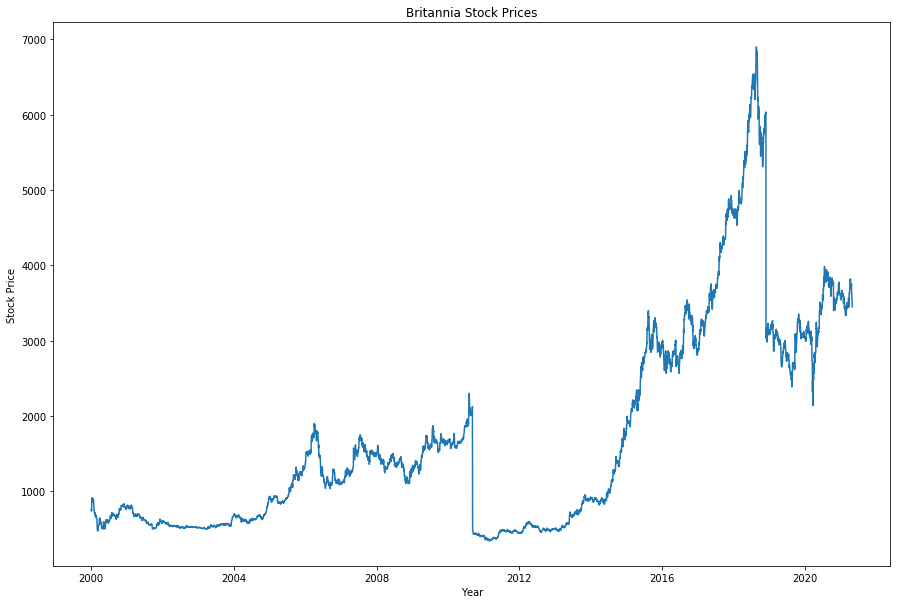

In [6]:
plt.figure(figsize=(15,10))
plt.plot(data['Close'])
plt.title("Britannia Stock Prices")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, shuffle=False, random_state=42)

In [8]:
print(X_train)

                 Date     Symbol Series  Prev Close     Open     High  \
Date                                                                    
2000-01-03 2000-01-03  BRITANNIA     EQ      703.25   705.00   759.50   
2000-01-04 2000-01-04  BRITANNIA     EQ      756.90   710.00   770.00   
2000-01-05 2000-01-05  BRITANNIA     EQ      754.55   755.00   759.00   
2000-01-06 2000-01-06  BRITANNIA     EQ      735.30   740.00   794.15   
2000-01-07 2000-01-07  BRITANNIA     EQ      785.65   808.00   848.50   
...               ...        ...    ...         ...      ...      ...   
2017-01-09 2017-01-09  BRITANNIA     EQ     2894.95  2920.00  2922.30   
2017-01-10 2017-01-10  BRITANNIA     EQ     2897.90  2899.00  2903.00   
2017-01-11 2017-01-11  BRITANNIA     EQ     2880.80  2885.00  2985.00   
2017-01-12 2017-01-12  BRITANNIA     EQ     2970.10  2984.95  2994.95   
2017-01-13 2017-01-13  BRITANNIA     EQ     2947.80  2969.00  2985.00   

                Low     Last    Close     VWAP  Vo

In [75]:
preds = []
# lag = 800
low_lag = None
low_rms = float('inf')
for lag in range(1,1000):
    preds = []

    for i in range(len(X_test)):
        if len(preds) < lag:
            a = X_train['Close'][len(X_train)-lag+i:].sum() + sum(preds)
        else:
            a = sum(preds[len(preds)-lag:])
        b = a/lag
        preds.append(b)
    rms=np.sqrt(np.mean(np.power((np.array(X_test['Close'])-preds),2)))
    if(rms<low_rms):
        low_rms = rms
        low_lag = lag
    
print(low_rms,low_lag)
# print(preds)

1307.9330989469408 141


In [9]:
preds = []
lag = 800
for i in range(len(X_test)):
    if len(preds) < lag:
        a = X_train['Close'][len(X_train)-lag+i:].sum() + sum(preds)
    else:
        a = sum(preds[len(preds)-lag:])
    b = a/lag
    preds.append(b)

In [10]:
rms=np.sqrt(np.mean(np.power((np.array(X_test['Close'])-preds),2)))
print(rms)

1646.8136166335073


C:\Users\91981\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


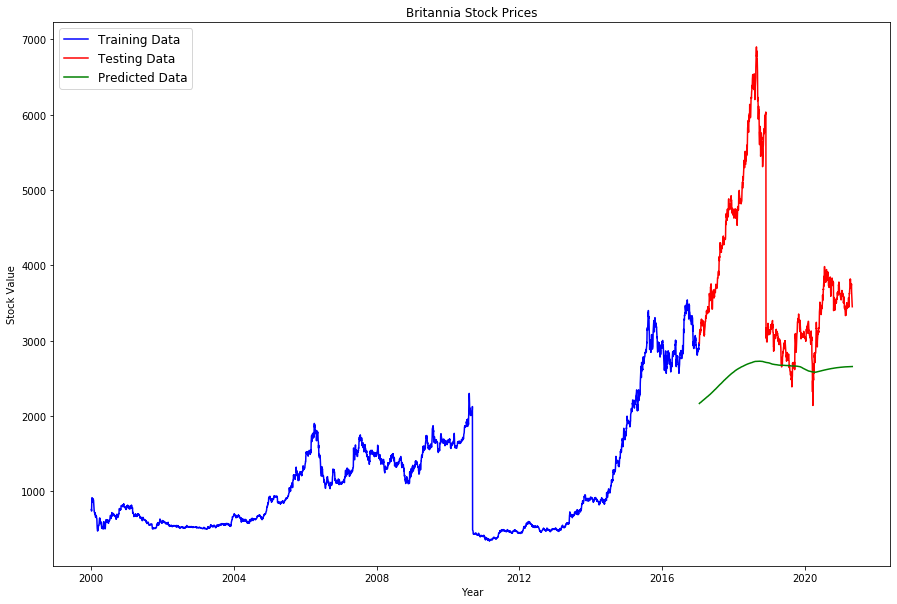

In [18]:
X_test['preds'] = preds
plt.figure(figsize=(15,10))
plt.plot(X_train['Close'], color="blue", label="Training Data")
plt.plot(X_test['Close'], color="red", label="Testing Data")
plt.plot(X_test['preds'], color="green", label="Predicted Data")
plt.xlabel("Year")
plt.ylabel("Stock Value")
plt.title("Britannia Stock Prices")
plt.legend(prop={'size': 12})
plt.show()